<a href="https://colab.research.google.com/github/MariaAsif123/Data-Science-and-Analytics-Internship-Tasks/blob/main/Task03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 3: Customer Churn Prediction (Bank Customers)**

1. Introduction & Problem Statement

In [5]:
# Goal: Predict which bank customers are likely to leave (churn).
# Type: Binary classification (Exited = 1 if churned, else 0).
# Value: Helps the bank prioritize retention efforts.

2. Imports

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

3. Dataset Understanding & Description

In [7]:
# File: Churn_Modelling.csv (Kaggle)
# Key columns (examples):
#   CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts,
#   HasCrCard, IsActiveMember, EstimatedSalary, Exited (target)

# Load dataset
df = pd.read_csv("Churn_Modelling.csv")

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
display(df.head())

Shape: (10000, 14)
Columns: ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


4. Data Cleaning & Preparation

In [8]:
# Check missing values
print("\nMissing values per column:\n", df.isna().sum())

# Drop non-informative ID columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Encode categorical features
# Gender: label encode (Male=1, Female=0)
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

# Geography: one-hot encode to keep interpretability
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)


Missing values per column:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


5. Exploratory Data Analysis (EDA) with Graphs

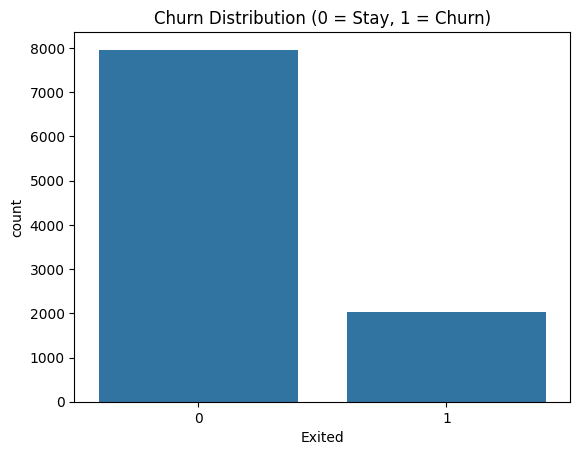

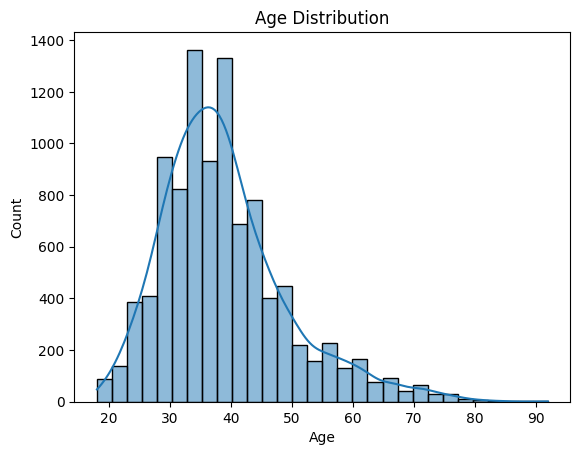

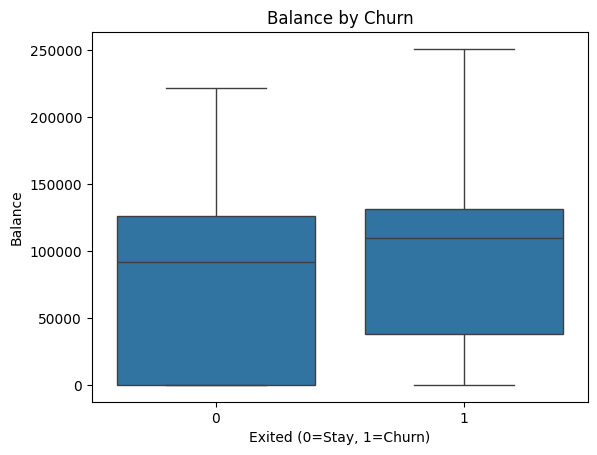

In [9]:
# Churn distribution
sns.countplot(data=df, x='Exited')
plt.title("Churn Distribution (0 = Stay, 1 = Churn)")
plt.show()

# Age distribution
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

# Balance by churn (boxplot)
sns.boxplot(data=df, x='Exited', y='Balance')
plt.title("Balance by Churn")
plt.xlabel("Exited (0=Stay, 1=Churn)")
plt.show()

6. Model Training & Testing

In [10]:
# Features & target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train model (Random Forest)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

7. Evaluation Metrics

Accuracy: 0.861
Confusion Matrix:
 [[1538   55]
 [ 223  184]]


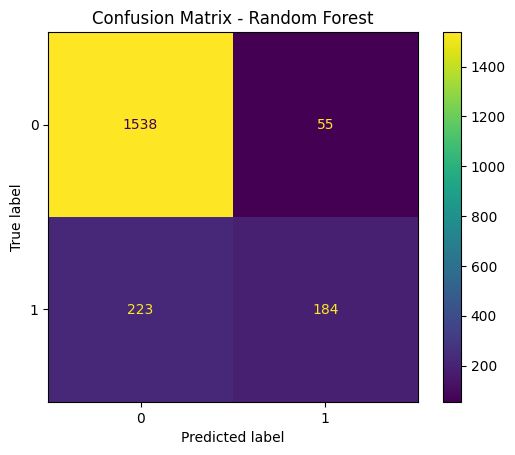

In [11]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", round(acc, 4))
print("Confusion Matrix:\n", cm)

# Confusion matrix plot
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()

8. Feature Importance (What influences churn?)


Top Features Influencing Churn:
 Age                  0.239730
EstimatedSalary      0.144951
CreditScore          0.144612
Balance              0.143798
NumOfProducts        0.123917
Tenure               0.081985
IsActiveMember       0.041726
Geography_Germany    0.028757
HasCrCard            0.018697
Gender               0.018053
dtype: float64


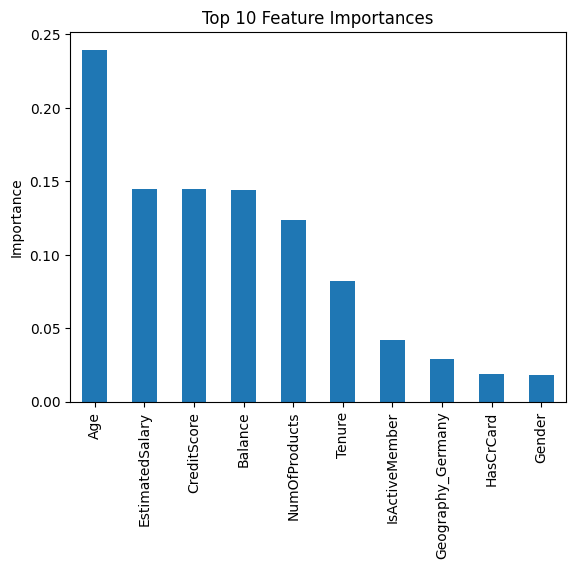

In [12]:
feat_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop Features Influencing Churn:\n", feat_imp.head(10))

# Plot feature importance (top 10)
feat_imp.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances")
plt.ylabel("Importance")
plt.show()

9. Conclusion (Key Insights)

In [13]:
# - The model predicts churn with the accuracy printed above.
# - Feature importance highlights which variables most affect churn (often Age, Balance,
#   IsActiveMember, CreditScore, etc. in this dataset).
# - Next steps to improve: hyperparameter tuning, try other models (e.g., XGBoost),
#   and address class imbalance if present.
